### 1. Importing the libraries

In [17]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

### 1. Loading the Dataset

In [7]:
# reading the csv file
data = pd.read_csv('Dataset/train - Copy.csv')

In [8]:
# looking at first five rows of the data
data.head()

,image_names,class
0,0.jpg,0
1,2.jpg,0
2,4.jpg,0
3,5.jpg,1
4,6.jpg,1


In [9]:
# distribution of classes in the dataset
data['class'].value_counts()

1    816
0    583
Name: class, dtype: int64

In [10]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data['class'].values

In [11]:
# shape of the image
X.shape
# (Number of images, Height, Width, Number of Channels)

(1399, 224, 224, 3)

### 2. Pre-processing the data

In [12]:
# converting 3 dimensional image to 1 dimensional image as the model can only handle 1-D image.
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(1399, 150528)

In [13]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [14]:
# normalizing the pixel values
X = X / X.max()

### 3. Creating training and validation set

In [33]:
seed = 42
rng = np.random.RandomState(seed)

In [20]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [21]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((979, 150528), (979,)), ((420, 150528), (420,)))

### 4. Defining the model architecture

In [22]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid')) #Hidden Layer
model.add(Dense(units=1, activation='sigmoid')) # Output Layer

In [23]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


### 5. Compiling the model

In [24]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

### 6. Training the model

In [25]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
8/8 [==============================] - 4s 245ms/step - loss: 0.8554 - accuracy: 0.5546 - val_loss: 0.6730 - val_accuracy: 0.5976
Epoch 2/50
8/8 [==============================] - 1s 163ms/step - loss: 0.6670 - accuracy: 0.5945 - val_loss: 0.7201 - val_accuracy: 0.4214
Epoch 3/50
8/8 [==============================] - 1s 193ms/step - loss: 0.6700 - accuracy: 0.5700 - val_loss: 0.6675 - val_accuracy: 0.6238
Epoch 4/50
8/8 [==============================] - 1s 174ms/step - loss: 0.6593 - accuracy: 0.6159 - val_loss: 0.7501 - val_accuracy: 0.4143
Epoch 5/50
8/8 [==============================] - 3s 436ms/step - loss: 0.6645 - accuracy: 0.6129 - val_loss: 0.6441 - val_accuracy: 0.6214
Epoch 6/50
8/8 [==============================] - 1s 155ms/step - loss: 0.6347 - accuracy: 0.6486 - val_loss: 0.8375 - val_accuracy: 0.4143
Epoch 7/50
8/8 [==============================] - 1s 161ms/step - loss: 0.6604 - accuracy: 0.6394 - val_loss: 0.6490 - val_accuracy: 0.6119
Epoch 8/50
8/8 [====

### 7. Evaluating model performance

In [26]:
# getting predictions in the form of probabilities

predictions = model.predict(X_valid)[:, 0]

14/14 [==============================] - 0s 27ms/step


In [27]:
predictions

array([0.55892247, 0.49511063, 0.74869627, 0.07682902, 0.621162  ,
       0.6716258 , 0.6129156 , 0.8464331 , 0.35344523, 0.10711164,
       0.2934228 , 0.6646265 , 0.7177737 , 0.40577284, 0.3998768 ,
       0.503599  , 0.31799555, 0.671243  , 0.53238744, 0.65266526,
       0.50647163, 0.56408393, 0.59240174, 0.5833353 , 0.6303624 ,
       0.65179044, 0.6035193 , 0.556128  , 0.02005094, 0.1357273 ,
       0.2327189 , 0.7086553 , 0.7127614 , 0.71527976, 0.6157788 ,
       0.35771123, 0.30256408, 0.42079976, 0.51096946, 0.773892  ,
       0.39629927, 0.01438572, 0.10513416, 0.614093  , 0.2967944 ,
       0.34418553, 0.594057  , 0.79438955, 0.5366359 , 0.73256   ,
       0.83843595, 0.44240755, 0.59112793, 0.1209059 , 0.176959  ,
       0.21378534, 0.5091686 , 0.68543357, 0.7655466 , 0.35099402,
       0.75202805, 0.4779822 , 0.6640855 , 0.49467346, 0.3289091 ,
       0.41945973, 0.08730309, 0.71540385, 0.42913732, 0.24796176,
       0.0488053 , 0.1869972 , 0.59775907, 0.8206235 , 0.78740

In [28]:
prediction = predictions.reshape(-1,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5560\1871260724.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [29]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.680952380952381 %


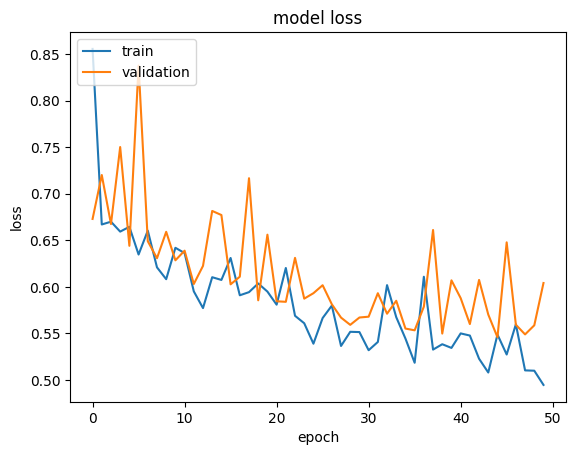

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

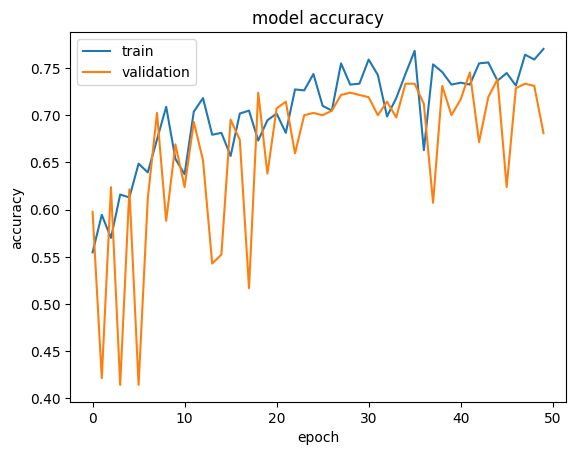

In [31]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 68 % sure that it is male
And actual class is  1


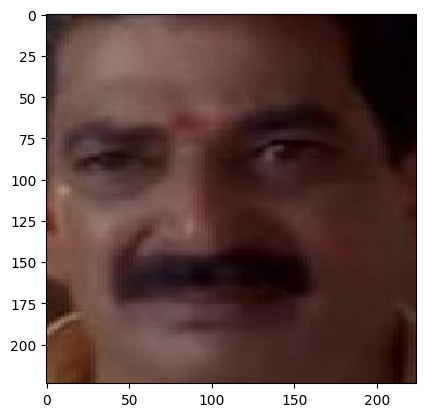

In [46]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (predictions * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)